In [94]:
from sklearn.datasets import load_digits;
from sklearn.linear_model import LogisticRegression;
from sklearn.model_selection import train_test_split;
from sklearn.metrics import confusion_matrix;
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
%matplotlib inline

## Load Digit data from sklearn

In [17]:
data = load_digits();
digitDF = pd.DataFrame(data.data,columns=range(0,64));
print("Each row represents 8*8 image");
digitDF.head()


Each row represents 8*8 image


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Classifier

In [27]:
trainX,testX,trainy,testy = train_test_split(data.data,data.target);
multinomialClassifier = LogisticRegression(solver='lbfgs',max_iter=100000,multi_class='multinomial').fit(trainX,trainy);
ovrClassifier = LogisticRegression(solver='lbfgs',max_iter=100000,multi_class='ovr').fit(trainX,trainy);
np.mean(multinomialClassifier.predict(testX) ==ovrClassifier.predict(testX))



0.96

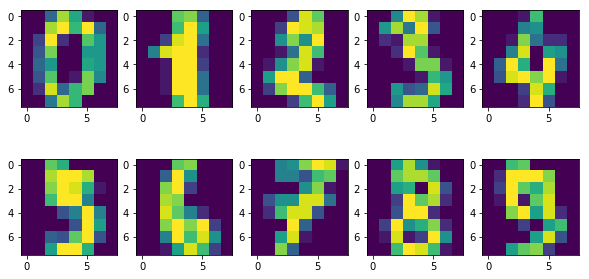

In [90]:
fig,axes = plt.subplots(2,5,figsize=(10,5));
for i in np.arange(10):
    axes[int(i/5),i%5].imshow(data.images[i]);

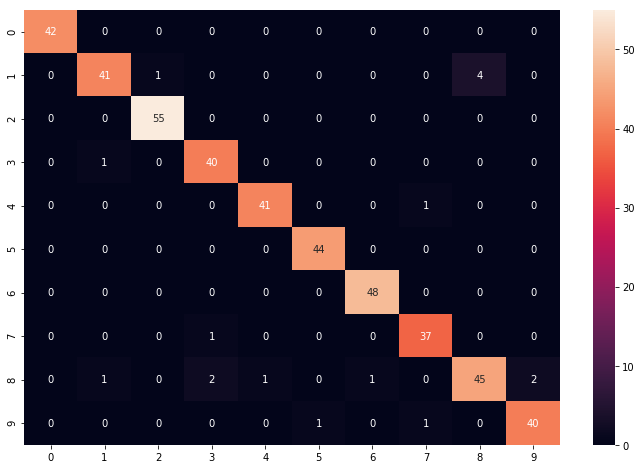

In [99]:
cm = confusion_matrix(multinomialClassifier.predict(testX),testy);
plt.figure(figsize=(12,8));
sns.heatmap(cm,annot=True);